In [116]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv("/home/dang032003/data_visualization/homework/hw1/Homework_sampledata1.txt", sep='\s+', names=['Day', '2008-1', '2008-2', '2008-3', '2008-4', '2008-5', '2008-6', '2008-7', '2008-8', '2008-9', '2008-10', '2008-11', '2008-12'])
df.drop(index=df.index[0], axis=0, inplace=True)
df.drop(columns=df.columns[0], axis=1,  inplace=True)

for col in df.columns:
    date_format = '%Y-%m'
    date=datetime.strptime(col, date_format)
    temp = df.iloc[0][col]
   
df1 = df.values.T.tolist()
df1 = np.array(df1, dtype=float)
df1[df1 == -99] = np.nan

Task 1

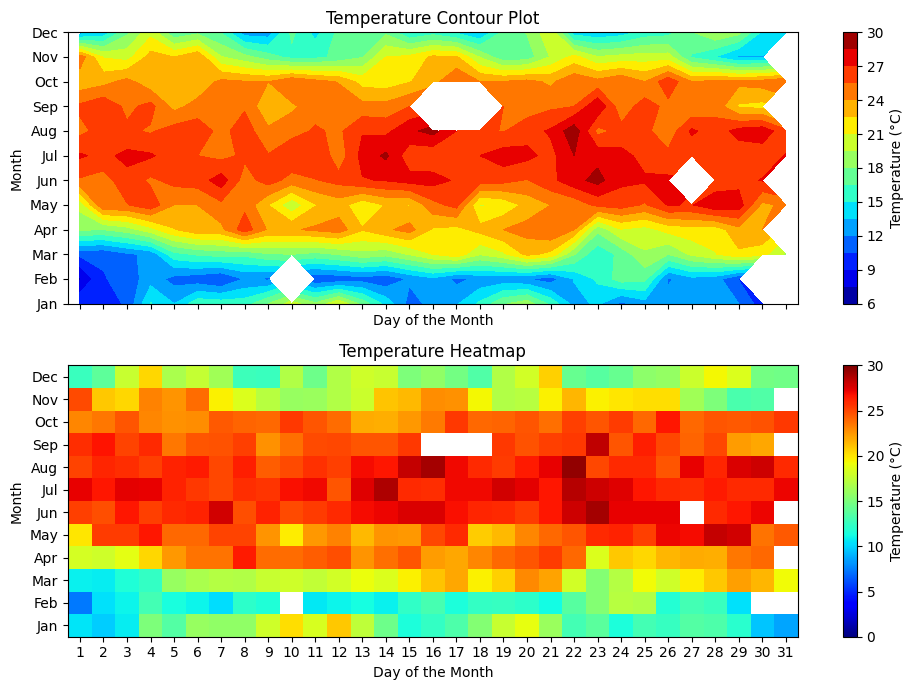

In [117]:
days = np.arange(1, 32)
months = np.arange(1, 13)

x_axis, y_axis = np.meshgrid(days, months)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)
num_levels = 20

#Subplot 1: Countour Plot
countour = ax1.contourf(x_axis, y_axis, df1, cmap='jet', levels = num_levels)
ax1.set_xlabel('Day of the Month')
ax1.set_ylabel('Month')
ax1.set_title('Temperature Contour Plot')
ax1.set_xticks(days)
ax1.set_yticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
cbar1 = plt.colorbar(countour, ax=ax1, label='Temperature (°C)')

#Subplot 2: Countour Plot
heatmap = ax2.pcolormesh(x_axis, y_axis, df1, cmap='jet', shading='auto', vmin=0, vmax=30)
ax2.set_xlabel('Day of the Month')
ax2.set_ylabel('Month')
ax2.set_yticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax2.set_title('Temperature Heatmap')
ax2.set_xticks(days)
cbar2 = plt.colorbar(heatmap, ax=ax2, label='Temperature (°C)')

plt.tight_layout()

plt.show()



Task 2

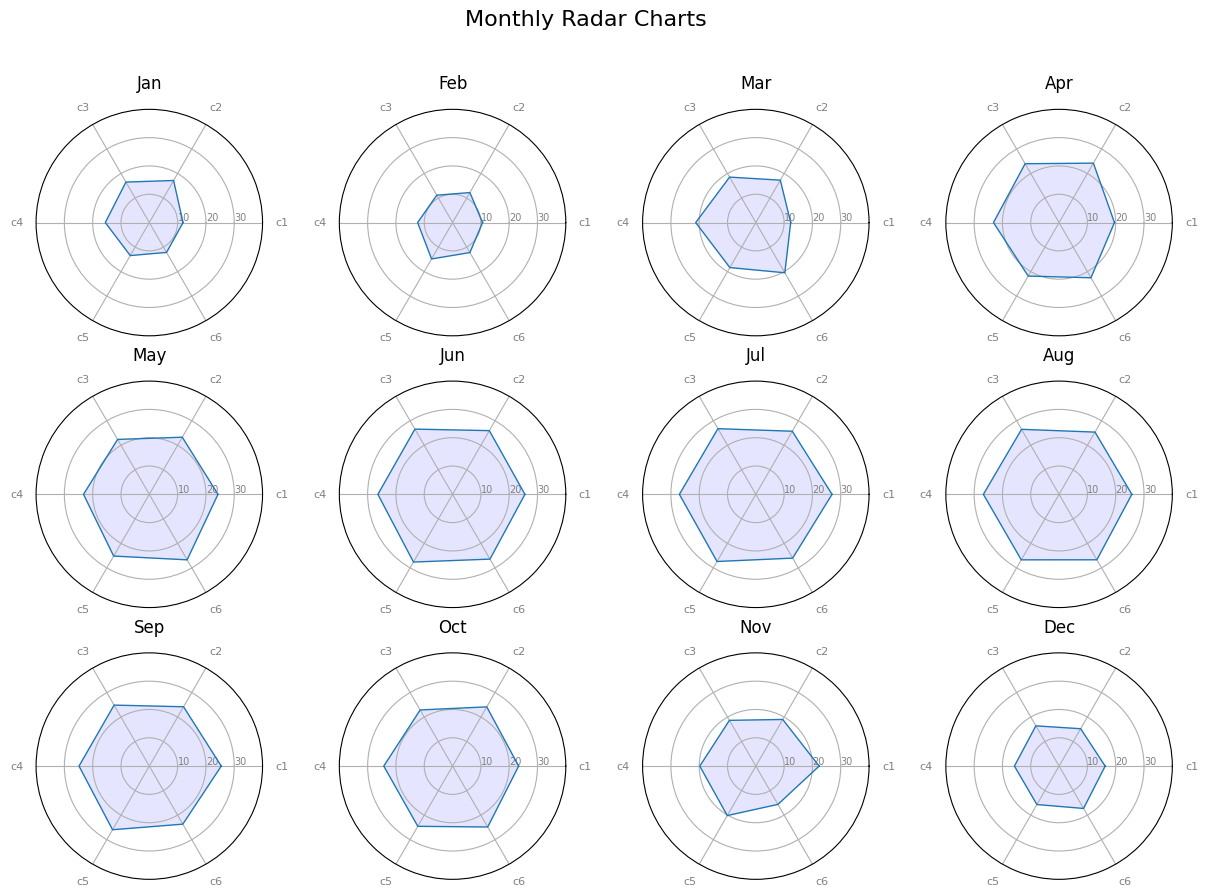

In [118]:

features = []
for i in range(6):
    feature = [np.mean(month[i * 5:(i + 1) * 5]) for month in df1]
    features.append(feature)

X = np.array(features).T

#Handle nan value with mean temperature of month
num_months = len(X)

for i in range(num_months):
    month_data = X[i]
    month_mean = np.nanmean(month_data)
    X[i][np.isnan(month_data)] = month_mean


num_features = len(features)

#Plotting
fig = plt.figure(figsize=(15, 10))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i in range(0, 12):
    ax = plt.subplot(3, 4, i + 1, polar=True)
    angles = [n / float(num_features) * 2 * pi for n in range(num_features)]
    angles += angles[:1]

    ax.set_title(months[i], size=12, pad=15)

    plt.xticks(angles[:-1], ['c1', 'c2', 'c3', 'c4', 'c5', 'c6'] , color='grey', size=8)

    # y labels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10", "20", "30"], color="grey", size=7)
    plt.ylim(0,40)

    toto = np.concatenate((X[i,:], X[i,:1]))
    ax.plot(angles, toto , linewidth=1, linestyle='solid')
    ax.fill(angles, toto, 'b', alpha=0.1)

plt.suptitle("Monthly Radar Charts", fontsize=16)    
plt.show()


Task 3

<Figure size 640x480 with 0 Axes>

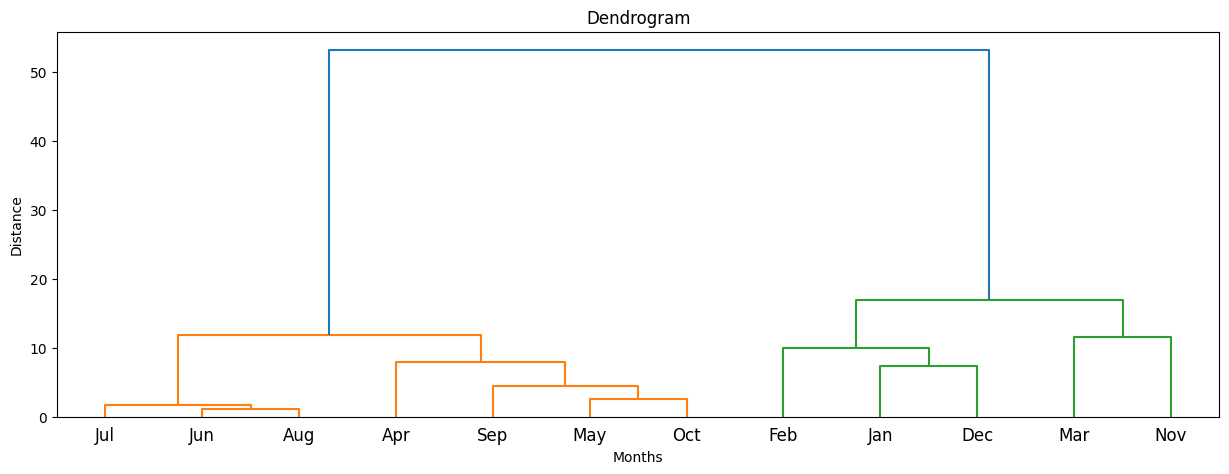

In [119]:
fig = plt.figure()
fig = plt.figure(figsize=(15, 5))
Z = linkage(X, 'ward')
dn = dendrogram(Z, labels=months, orientation='top')

plt.title('Dendrogram')
plt.xlabel('Months')
plt.ylabel('Distance')
plt.show()

